In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import rcParams
from scipy.stats import multivariate_normal
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
%matplotlib inline

rcParams['figure.figsize'] = 8, 5
COLORS = ['r', 'g', 'b', 'c', 'm', 'y', 'purple', 'lime', 'pink', 'yellow', 'orange', 'brown']


In [2]:
class1 = pd.read_csv('ls_data/class1.txt', sep=",")
c = [0]*1000
class1['class'] = c

In [3]:
class2 = pd.read_csv("ls_data/class2.txt", sep = ",")
c = [1]*1000
class2['class'] = c

In [4]:
data = pd.concat([class1, class2])
data

,Component1,Component2,class
0,3.7003,1.84810,0
1,7.7993,1.28080,0
2,-5.1431,-0.42389,0
3,4.7264,0.81755,0
4,3.0080,1.65800,0
...,...,...,...
995,6.5106,36.64300,1
996,5.1640,29.86400,1
997,4.7172,26.10000,1
998,6.1522,31.82400,1


In [5]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

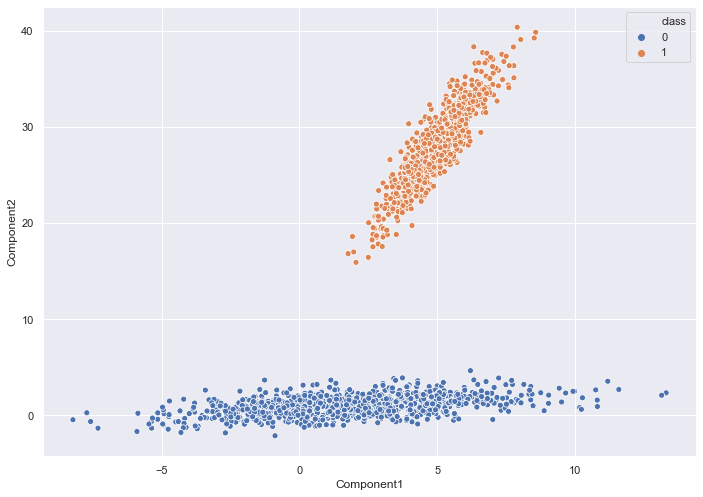

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=data.Component1, y=data.Component2, hue="class", data = data)

In [7]:
def plot_boundary(X, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    preds = model.predict(np.c_[xx.ravel(), yy.ravel()])
    preds = preds.reshape(xx.shape)
    
    fig, ax = plt.subplots(1, 1, figsize=(11.7,8.27))
    ax.contourf(xx, yy, preds)

In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

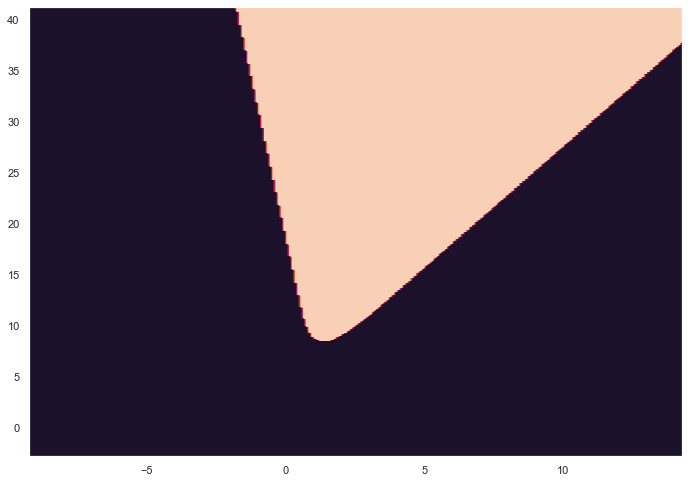

In [9]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X_train,y_train)
plot_boundary(X_train, clf)

In [10]:
y_pred=clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test,y_pred),"\n")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred),"\n")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       1.00      1.00      1.00       318

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600
 

Confusion Matrix:
 [[282   0]
 [  0 318]] 



In [11]:
class1 = pd.read_csv('nls_data/class1.txt', sep=",")
c = [0]*1000
class1['class'] = c

In [12]:
class2 = pd.read_csv("nls_data/class2.txt", sep = ",")
c = [1]*1000
class2['class'] = c

In [13]:
data = pd.concat([class1, class2])
data

,Component1,Component2,class
0,4.53770,7.5864,0
1,5.83390,18.0430,0
2,1.74120,-11.3020,0
3,4.86220,10.3990,0
4,4.31880,6.3741,0
...,...,...,...
995,-2.90240,37.2550,1
996,1.37420,5.8201,1
997,-1.23330,21.7620,1
998,-0.59612,18.0180,1


In [14]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

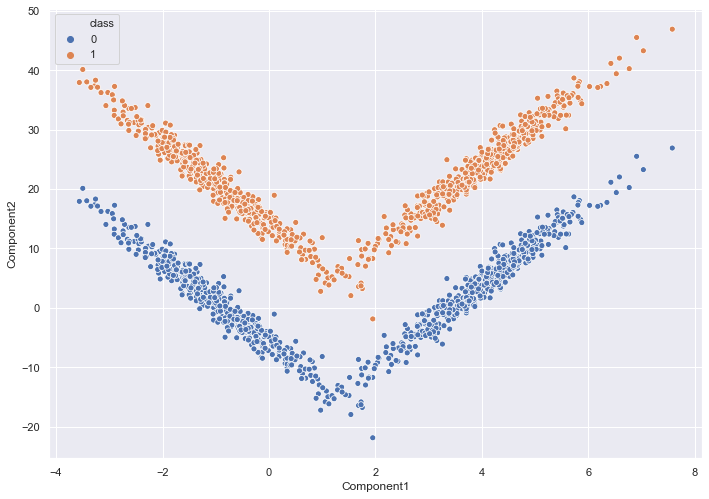

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=data.Component1, y=data.Component2, hue="class", data = data)

In [16]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

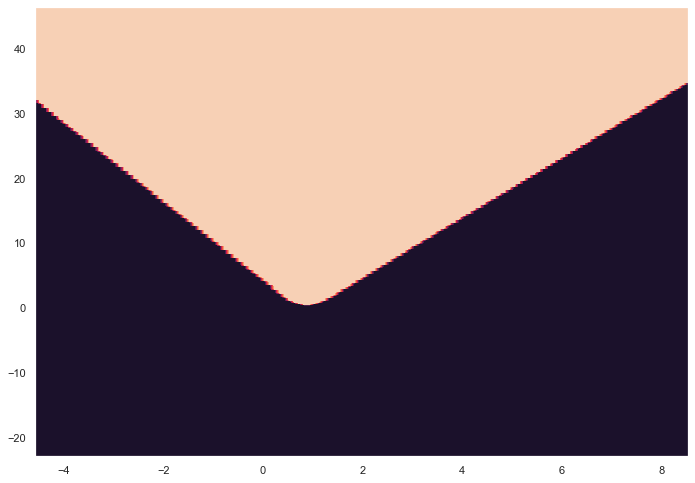

In [17]:
clf = MLPClassifier()
clf.fit(X_train,y_train)
plot_boundary(X_train, clf)

In [18]:
y_pred=clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test,y_pred),"\n")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred),"\n")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       313

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600
 

Confusion Matrix:
 [[287   0]
 [  1 312]] 

